## Partial differential equations

### Boundary condition problems

#### Problem 1

A square box of side $L = 1$ m has conducting walls. All walls are grounded at $V = 0$ volts, except the top one which is at $V = 1$ Volt. Considering these boundaries conditions, solve the Laplace's equation

$\nabla^2 \phi = 0$,

to find the value of the electrostatic potential $\phi$ inside the box, considering an equally spaced grid of $100 \times 100$ points. Set a precision requirement $\delta = 10^{-6}$ volts.

In [1]:
import numpy as np

#Solving the problem using Gauss-Seidel with overrelaxation
def pde1_gauss_seidel(grid,omega,tol):
    N = len(grid)
    deltamax = 1.
    # Iterate until the largest difference between phi[i,j] at the current iteration and phi[i,j] 
    # at the previous iteration becomes smaller than tol. The maximum is taken among all points in the grid.
    demomode = False
    if demomode:
        count = 0
    while (deltamax > tol):
        if demomode:
            count += 1
        deltamax = 0.
        for i in range(1,N-1):
            for j in range(1,N-1):
                gridold = grid[i,j]
                # Updating grid points
                grid[i,j] = ((1. + omega)/4.)*(grid[i+1,j] + grid[i-1,j] + grid[i,j-1] + grid[i,j+1]) - omega*grid[i,j]
                # Computing the difference between the updated and old value of the potential for each point in the grid, 
                # and saving the largest difference among all points
                delta = abs(grid[i,j] - gridold)
                deltamax = max(delta,deltamax)
        if demomode:
            print(count)
    return grid

In [2]:
grid = np.zeros((101,101),dtype='float')
grid[0,:] = 1.0
tol = 1e-6
omega = 0.9

grid = pde1_gauss_seidel(grid,omega,tol)
        

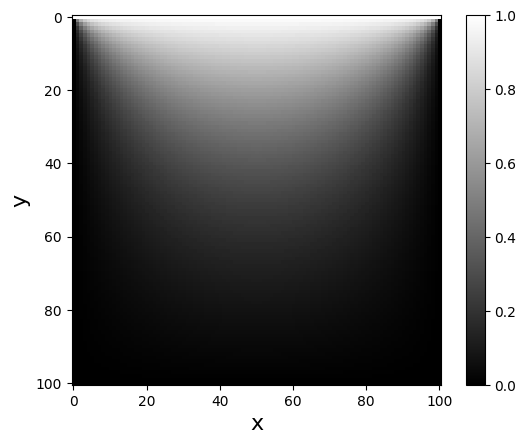

In [3]:
import matplotlib.pyplot as plt
from pylab import imshow

plt.imshow(grid,cmap='gray')
plt.colorbar()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.show()

#### Problem 2

A square box of side $L = 1$ m has conducting walls. All walls are grounded at $V = 0$ volts. Two square $20 \, {\rm cm} \times 20 \, {\rm cm}$ charges are placed as in figure below ('Charge distribution'). Their charge density is $\pm 1$ C$ {\rm m}^{-2}$  Considering these boundaries conditions, solve the Laplace's equation

$\nabla^2 \phi = 0$,

to find the value of the electrostatic potential $\phi$ inside the box, considering an equally spaced grid of $100 \times 100$ points. Set a precision requirement $\delta = 10^{-6}$ volts.

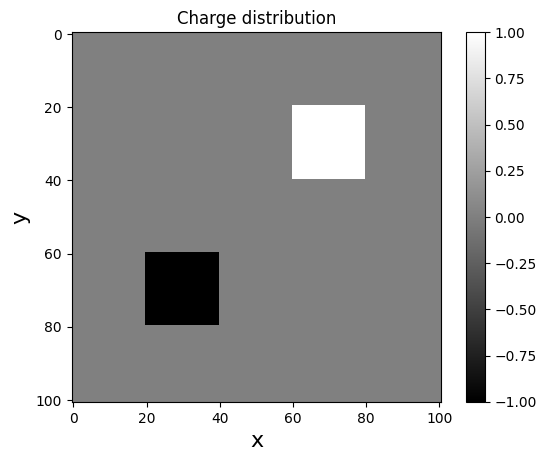

In [4]:
rho = np.zeros((101,101),dtype='float')
rho[20:40,60:80] = 1.0
rho[60:80,20:40] = -1.0
plt.imshow(rho,cmap='gray')
plt.colorbar()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.title('Charge distribution')
plt.show()

In [5]:
#Solving the problem using Gauss-Seidel with overrelaxation
def pde2_gauss_seidel(phi,rho,omega,tol):
    N = len(phi)
    deltamax = 1.
    eps0 = 8.9e-12
    a = 0.01
    # Iterate until the largest difference between phi[i,j] at the current iteration and phi[i,j] 
    # at the previous iteration becomes smaller than tol. The maximum is taken among all points in the grid.
    demomode = False
    if demomode:
        count = 0
    while (deltamax > tol):
        if demomode:
            count += 1
        deltamax = 0.
        for i in range(1,N-1):
            for j in range(1,N-1):
                phiold = phi[i,j]
                # Updating grid points, now including source term
                phi[i,j] =  ( ((1. + omega)/4.)*(phi[i+1,j] + phi[i-1,j] + phi[i,j-1] + phi[i,j+1]) 
                + a**2*rho[i,j]/(4.*eps0) - omega*phi[i,j] )
                # Computing the difference between the updated and old value of the potential for each point in the grid, 
                # and saving the largest difference among all points
                delta = abs(phi[i,j] - phiold)
                deltamax = max(delta,deltamax)
        if demomode:
            print(count)
    return phi

In [6]:
phi = np.zeros((101,101),dtype='float')
rho = np.zeros((101,101),dtype='float')
rho[20:40,60:80] = 1.0
rho[60:80,20:40] = -1.0
tol = 1e-6
omega = 0.9

grid = pde2_gauss_seidel(phi,rho,omega,tol)

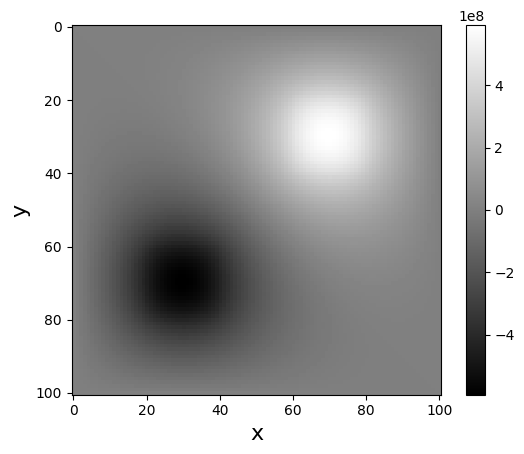

In [7]:
import matplotlib.pyplot as plt
from pylab import imshow

plt.imshow(grid,cmap='gray')
plt.colorbar()
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.show()

### Initial value problems. The FTCS method

#### Problem: the heat equation

The flat base of a container made of 1 cm thick stainless steel (thermal disffusivity $D = 4.25 \times 10^{-6} \, {\rm m}^2 \, {\rm s}^{-1}$  is initially at a uniform temeprature of $293.16$ K everywhere. The container is placed in a bath of cold water at $273.16$ K and filled with hot water at $323.16$ K (see slides for picture). Calculate the temperature profile as a function of the distance x from the hot side to the cold side, as a function of time from $t_0 = 0$ s to $t_1 = 10$ s. Plot the profile at times $t = 0.01, 0.1, 0.4$ and $10$ s.

One-dimensional diffusion equation:

$\large \frac{\partial{\phi}}{\partial{t}} = D \frac{\partial^2 \phi}{\partial x^2}$

In [8]:
import numpy as np

# Solving diffusion equation with FTCS
def FTCS(T0,D,a,times,tol):
    # Time step
    h = times[1] - times[0]
    N = len(T0)
    temperature = np.zeros( (len(times),N) )
    # Initial conditions
    temperature[0,:] = np.copy(T0)
    # Boundary conditions
    temp = np.zeros(len(T0))
    temp[0] = T0[0]
    temp[N-1] = T0[N-1]
    # Integrating equation using FTCS
    for i in range(1,len(times)):
        temp[1:N-1] = temperature[i-1,1:N-1] + h*(D/(a**2))*(temperature[i-1,2:N] + temperature[i-1,0:N-2] - 
                                                             2*temperature[i-1,1:N-1])
        temperature[i,:] = np.copy(temp[:])
    
    return temperature

In [9]:
# Diffusion coefficients
D = 4.25*1e-6
# Grid
N = 101
a = 1e-4
# Initial and boundary conditions
T0 = np.zeros(N)
T0[0] = 323.16
T0[N-1] = 273.16
T0[1:N-1] = 293.16
# Times at which the solution is computed (from 0 to 10 sec, with 1 millisecond step)
times = np.arange(0.,10.001,1e-3)

Tx = FTCS(T0,D,a,times,tol)

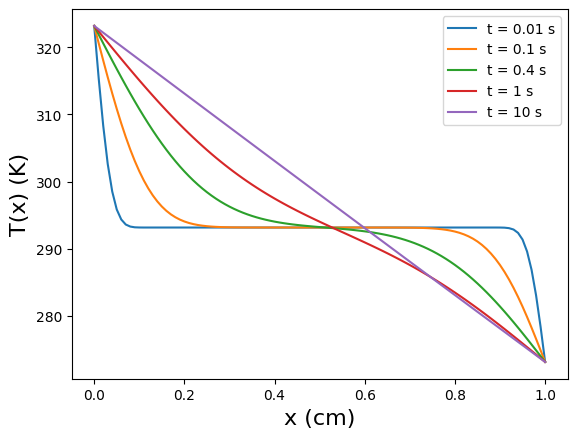

In [10]:
import matplotlib.pyplot as plt

x = np.arange(0,1.01,0.01)
plt.plot(x,Tx[10,:],label='t = 0.01 s')
plt.plot(x,Tx[100,:],label='t = 0.1 s')
plt.plot(x,Tx[400,:],label='t = 0.4 s')
plt.plot(x,Tx[1000,:],label='t = 1 s')
plt.plot(x,Tx[10000,:],label='t = 10 s')
plt.legend()
plt.xlabel('x (cm)',size = 16)
plt.ylabel('T(x) (K)',size= 16)
plt.show()